In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [11]:
df = pd.read_csv("handwritten_data_785.csv")
type(df)

pandas.core.frame.DataFrame

In [12]:
arr = np.array(df)
data = arr[:, 1:] / 255
target = arr[:, 0]

In [13]:
# input = keras.layers.Input(shape=[784])
# hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
# hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
# output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
# model = keras.Model(inputs = input, outputs = output)

# model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics = keras.metrics.Accuracy())

XTrainFull, XTest, yTrainFull, yTest = train_test_split(data, target)
XTrain, XValid, yTrain, yValid = train_test_split(XTrainFull, yTrainFull)

In [14]:
# Build a simple mlp model
input = keras.layers.Input(shape=[784])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
model = keras.Model(inputs=input, outputs=output)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = model.fit(XTrain, yTrain, epochs=30, validation_data=(XValid, yValid))

Epoch 1/30
6540/6540 [==============================] - 19s 3ms/step - loss: 0.7064 - accuracy: 0.8121 - val_loss: 0.4270 - val_accuracy: 0.8892
Epoch 2/30
6540/6540 [==============================] - 15s 2ms/step - loss: 0.3562 - accuracy: 0.9056 - val_loss: 0.3071 - val_accuracy: 0.9196
Epoch 3/30
6540/6540 [==============================] - 21s 3ms/step - loss: 0.2661 - accuracy: 0.9300 - val_loss: 0.2383 - val_accuracy: 0.9372
Epoch 4/30
6540/6540 [==============================] - 19s 3ms/step - loss: 0.2175 - accuracy: 0.9432 - val_loss: 0.2053 - val_accuracy: 0.9456
Epoch 5/30
6540/6540 [==============================] - 16s 2ms/step - loss: 0.1871 - accuracy: 0.9512 - val_loss: 0.1866 - val_accuracy: 0.9511
Epoch 6/30
6540/6540 [==============================] - 16s 2ms/step - loss: 0.1661 - accuracy: 0.9566 - val_loss: 0.1681 - val_accuracy: 0.9557
Epoch 7/30
6540/6540 [==============================] - 17s 3ms/step - loss: 0.1503 - accuracy: 0.9609 - val_loss: 0.1572 - val_ac

In [15]:
yPred = model.predict(XTest[:3]).round(2)
print(yPred)
print(
    [
        j
        for i in range(len(yPred))
        for j in range(len(yPred[0]))
        if yPred[i, j] == max(yPred[i])
    ]
)

1/1 [==============================] - 0s 257ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.98 0.   0.   0.   0.   0.02 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[11, 19, 14]


In [16]:
input = keras.layers.Input(shape=[784])
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(10, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
model1 = keras.Model(inputs=input, outputs=output)

model1.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = model1.fit(XTrain, yTrain, epochs=30, validation_data=(XValid, yValid))

Epoch 1/30
6540/6540 [==============================] - 18s 3ms/step - loss: 1.1985 - accuracy: 0.6683 - val_loss: 0.7282 - val_accuracy: 0.8025
Epoch 2/30
6540/6540 [==============================] - 13s 2ms/step - loss: 0.6286 - accuracy: 0.8302 - val_loss: 0.5631 - val_accuracy: 0.8467
Epoch 3/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.5105 - accuracy: 0.8632 - val_loss: 0.4870 - val_accuracy: 0.8676
Epoch 4/30
6540/6540 [==============================] - 13s 2ms/step - loss: 0.4416 - accuracy: 0.8817 - val_loss: 0.4254 - val_accuracy: 0.8854
Epoch 5/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.3943 - accuracy: 0.8944 - val_loss: 0.3830 - val_accuracy: 0.8958
Epoch 6/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.3614 - accuracy: 0.9031 - val_loss: 0.3560 - val_accuracy: 0.9042
Epoch 7/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.3375 - accuracy: 0.9100 - val_loss: 0.3339 - val_ac

In [17]:
yPred = model1.predict(XTest[:3])
print(
    [
        j
        for i in range(len(yPred))
        for j in range(len(yPred[0]))
        if yPred[i, j] == max(yPred[i])
    ]
)
print(yTest[:3])

1/1 [==============================] - 0s 68ms/step
[11, 19, 14]
[11 19 14]


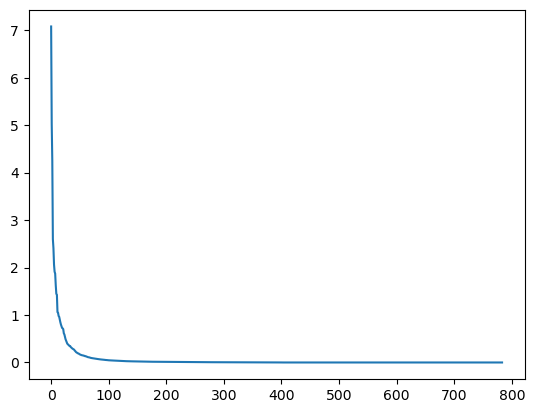

In [18]:
pca = PCA()
pca.fit(XTrain)
variance = pca.explained_variance_

plt.plot(variance)

In [19]:
pca = PCA(n_components=80)
pca.fit(XTrain)
variance = pca.explained_variance_
# pd.DataFrame(variance).to_csv('Explained_variance.csv')

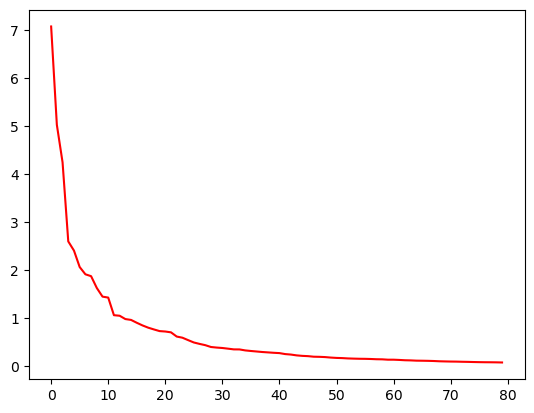

In [20]:
plt.plot(variance, "r-")

In [21]:
components = pca.components_
components.shape

(80, 784)

In [22]:
XTrainTransformed = pca.transform(XTrain)
XValidTransformed = pca.transform(XValid)
XTestTransformed = pca.transform(XTest)

In [ ]:
# XTrain = XTrain.T
# XValid = XValid.T
# XTest = XTest.T

# print(XTrain.shape, XValid.shape, XTest.shape)
# np.cov(components)

(209270, 400) (69757, 400) (93010, 400)


array([[ 9.94196815e-04, -6.53897522e-06, -9.06861064e-05, ...,
         4.70849494e-07, -4.46724529e-06,  3.64066039e-06],
       [-6.53897522e-06,  1.27698809e-03, -2.09581250e-06, ...,
         1.08816256e-08, -1.03240826e-07,  8.41379331e-08],
       [-9.06861064e-05, -2.09581250e-06,  1.24807333e-03, ...,
         1.50912371e-07, -1.43180058e-06,  1.16687115e-06],
       ...,
       [ 4.70849494e-07,  1.08816256e-08,  1.50912371e-07, ...,
         1.27713842e-03,  7.43402275e-09, -6.05848805e-09],
       [-4.46724529e-06, -1.03240826e-07, -1.43180058e-06, ...,
         7.43402275e-09,  1.27706868e-03,  5.74806865e-08],
       [ 3.64066039e-06,  8.41379331e-08,  1.16687115e-06, ...,
        -6.05848805e-09,  5.74806865e-08,  1.27709236e-03]])

With Principal Component Analysis

In [24]:
input = keras.layers.Input(shape=[80])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
modelWithPca = keras.Model(inputs=input, outputs=output)

modelWithPca.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)
history = modelWithPca.fit(XTrainTransformed, yTrain, epochs=35, validation_data=(XValidTransformed, yValid))

Epoch 1/35
6540/6540 [==============================] - 16s 2ms/step - loss: 0.6939 - accuracy: 0.8149 - val_loss: 0.3724 - val_accuracy: 0.8985
Epoch 2/35
6540/6540 [==============================] - 18s 3ms/step - loss: 0.3106 - accuracy: 0.9168 - val_loss: 0.2669 - val_accuracy: 0.9268
Epoch 3/35
6540/6540 [==============================] - 18s 3ms/step - loss: 0.2369 - accuracy: 0.9378 - val_loss: 0.2181 - val_accuracy: 0.9405
Epoch 4/35
6540/6540 [==============================] - 19s 3ms/step - loss: 0.1974 - accuracy: 0.9481 - val_loss: 0.1886 - val_accuracy: 0.9495
Epoch 5/35
6540/6540 [==============================] - 18s 3ms/step - loss: 0.1720 - accuracy: 0.9548 - val_loss: 0.1694 - val_accuracy: 0.9549
Epoch 6/35
6540/6540 [==============================] - 18s 3ms/step - loss: 0.1540 - accuracy: 0.9596 - val_loss: 0.1561 - val_accuracy: 0.9586
Epoch 7/35
6540/6540 [==============================] - 22s 3ms/step - loss: 0.1402 - accuracy: 0.9630 - val_loss: 0.1459 - val_ac

In [25]:
modelWithPca.evaluate(XTestTransformed, yTest)

2907/2907 [==============================] - 6s 2ms/step - loss: 0.0851 - accuracy: 0.9785


[0.0850527435541153, 0.9785076975822449]

In [27]:
input = keras.layers.Input(shape=[80])
hidden1 = keras.layers.Dense(30, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(30, activation=keras.activations.relu)(hidden1)
hidden3 = keras.layers.Dense(10, activation=keras.activations.relu)(hidden2)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden3)
modelWithPca = keras.Model(inputs=input, outputs=output)

modelWithPca.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)
history = modelWithPca.fit(XTrainTransformed, yTrain, epochs=30, validation_data=(XValidTransformed, yValid))

Epoch 1/30
6540/6540 [==============================] - 13s 2ms/step - loss: 1.2328 - accuracy: 0.6526 - val_loss: 0.6068 - val_accuracy: 0.8290
Epoch 2/30
6540/6540 [==============================] - 12s 2ms/step - loss: 0.5096 - accuracy: 0.8575 - val_loss: 0.4377 - val_accuracy: 0.8777
Epoch 3/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.4069 - accuracy: 0.8876 - val_loss: 0.3780 - val_accuracy: 0.8946
Epoch 4/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.3548 - accuracy: 0.9031 - val_loss: 0.3365 - val_accuracy: 0.9086
Epoch 5/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.3227 - accuracy: 0.9119 - val_loss: 0.3081 - val_accuracy: 0.9146
Epoch 6/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.3000 - accuracy: 0.9178 - val_loss: 0.2934 - val_accuracy: 0.9194
Epoch 7/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.2833 - accuracy: 0.9227 - val_loss: 0.2789 - val_ac

In [29]:
modelWithPca.evaluate(XTestTransformed, yTest)

2907/2907 [==============================] - 3s 1ms/step - loss: 0.2008 - accuracy: 0.9457


[0.20075519382953644, 0.9457154870033264]

With Linear Discriminant Analysis

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=25)

XTrainLda = lda.fit_transform(XTrain, yTrain)
XValidLda = lda.transform(XValid)
XTestLda = lda.transform(XTest)

input = keras.layers.Input(shape=[25])
hidden1 = keras.layers.Dense(300, activation=keras.activations.relu)(input)
hidden2 = keras.layers.Dense(100, activation=keras.activations.relu)(hidden1)
output = keras.layers.Dense(26, activation=keras.activations.softmax)(hidden2)
modelWithLda = keras.Model(inputs=input, outputs=output)

modelWithLda.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"],
)

history = modelWithLda.fit(XTrainLda, yTrain, epochs=30, validation_data=(XValidLda, yValid))

modelWithLda.evaluate(XTestLda, yTest)

Epoch 1/30
6540/6540 [==============================] - 11s 2ms/step - loss: 0.7080 - accuracy: 0.8129 - val_loss: 0.4599 - val_accuracy: 0.8722
Epoch 2/30
6540/6540 [==============================] - 10s 1ms/step - loss: 0.3978 - accuracy: 0.8885 - val_loss: 0.3642 - val_accuracy: 0.8981
Epoch 3/30
6540/6540 [==============================] - 10s 1ms/step - loss: 0.3274 - accuracy: 0.9085 - val_loss: 0.3132 - val_accuracy: 0.9129
Epoch 4/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.2867 - accuracy: 0.9200 - val_loss: 0.2828 - val_accuracy: 0.9209
Epoch 5/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.2605 - accuracy: 0.9270 - val_loss: 0.2636 - val_accuracy: 0.9255
Epoch 6/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.2423 - accuracy: 0.9320 - val_loss: 0.2486 - val_accuracy: 0.9296
Epoch 7/30
6540/6540 [==============================] - 10s 2ms/step - loss: 0.2285 - accuracy: 0.9358 - val_loss: 0.2388 - val_ac

[0.17851035296916962, 0.9497043490409851]